<a href="https://colab.research.google.com/github/hsmathang/Machine-learning-Projects-and-tasks-2022/blob/main/Double%20Descent%20in%20Home.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [27]:

sns.set()

dfs = [
    pd.read_csv("/content/drive/MyDrive/2022/Matemáticas para Machine Learning/DDd/log_01.txt"), 
    pd.read_csv("/content/drive/MyDrive/2022/Matemáticas para Machine Learning/DDd/log_02.txt"),
    pd.read_csv("/content/drive/MyDrive/2022/Matemáticas para Machine Learning/DDd/log_04.txt"),
        pd.read_csv("/content/drive/MyDrive/2022/Matemáticas para Machine Learning/DDd/Copia de log_08.txt"),

    pd.read_csv("/content/drive/MyDrive/2022/Matemáticas para Machine Learning/DDd/log_16.txt"),
    pd.read_csv("/content/drive/MyDrive/2022/Matemáticas para Machine Learning/DDd/log_32.txt"),
    pd.read_csv("/content/drive/MyDrive/2022/Matemáticas para Machine Learning/DDd/log_64-451.txt"),
]

def make_array(key):
    ddd = np.zeros((451, 64))
    for i in range(1,65):
        a = int(np.log2(i)//1)
        if a == 6:
            ddd[:,i-1] = dfs[a][key].values
        else:
            b = a + 1
            ddd[:,i-1] = ((2**b-i)*dfs[a][key].values + (i-2**a)*dfs[b][key].values) / (2**b-2**a)
    return ddd





In [107]:
int(np.log2(16)//1)
y_idx=np.zeros(451,)
for i in range(1,452):
  y_idx[i-1]=i

y_idx

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 15

In [99]:
from numpy.ma.core import size
ddd_train_error = make_array("Train Error")
ddd_test_error = make_array("Test Error")
np.shape(ddd_test_error)


(451, 64)

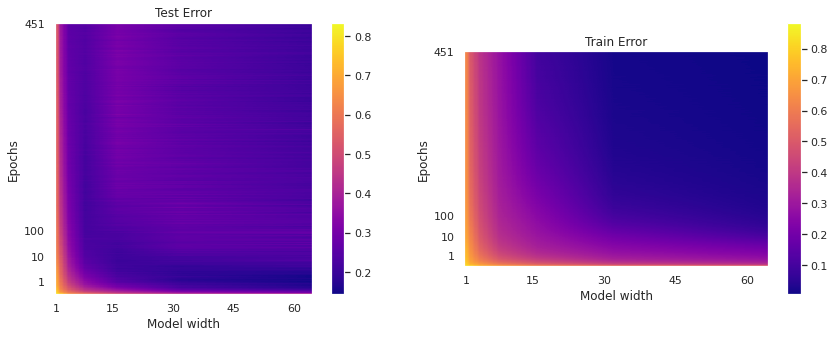

In [141]:
fig = plt.figure(figsize=(15,5))
y_idx=np.zeros(451,).astype(int)
for i in range(1,451):
  y_idx[i-1]=i
ax1 = fig.add_subplot(1, 2, 1)
im1 = ax1.imshow(np.flipud(ddd_test_error[y_idx, :]), cmap='plasma', aspect=0.15)
ax1.set_xlabel("Model width")
ax1.set_ylabel("Epochs")
ax1.set_xticks([0, 14, 29, 44, 59])
ax1.set_xticklabels([1, 15, 30, 45, 60,])
ax1.set_yticks([0, 344, 388, 429])
ax1.set_yticklabels([451, 100, 10, 1,])
ax1.set_title("Test Error")
ax1.grid(False)
fig.colorbar(im1, ax=ax1)

ax2 = fig.add_subplot(1, 2, 2)
im2 = ax2.imshow(np.flipud(ddd_train_error[y_idx, :]), cmap='plasma', aspect=0.1)
ax2.set_xlabel("Model width")
ax2.set_ylabel("Epochs")
ax2.set_xticks([0, 14, 29, 44, 59])
ax2.set_xticklabels([1, 15, 30, 45, 60,])
#ax2.set_yticks([0, 74, 148, 199])
ax2.set_yticks([0, 344, 388, 429])
ax2.set_yticklabels([451, 100, 10, 1,])
ax2.set_title("Train Error")
ax2.grid(False)
fig.colorbar(im2, ax=ax2)

plt.show()

In [174]:
x_idx=np.zeros(64,).astype(int)
for i in range(1,65):
  x_idx[i-1]=i
 
x_idx
X = np.arange(1, 65)
X

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64])

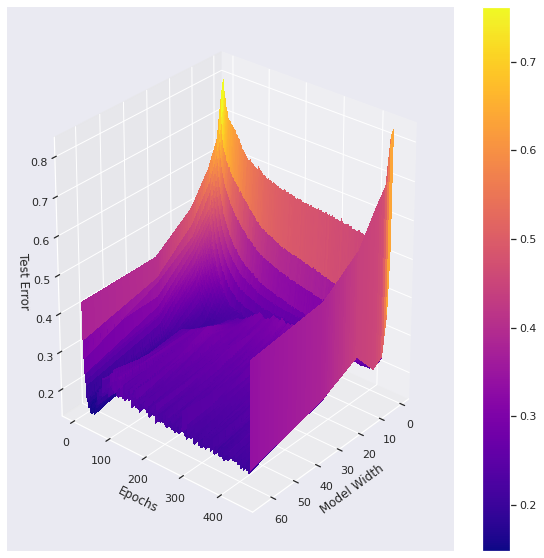

In [230]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(1, 65)
Y = np.arange(1, 452)
X, Y = np.meshgrid(X, Y)
#R = np.sqrt(X**2 + Y**2)
Z = ddd_test_error[y_idx,:]
fig = plt.figure( figsize=(10, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='plasma', linewidth=0, antialiased=False)
#ax.set_zlim(-1.01, 1.01)
ax.set_xlabel('Model Width')
ax.set_ylabel('Epochs')
ax.set_zlabel(r'Test Error')
fig.colorbar(surf, shrink=1, aspect=19)
ax.view_init(25, 40)
plt.show()